In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv('train (2).csv')
test_data=pd.read_csv('test (3).csv')

In [ ]:
train_data.head(891)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
numerical_features= [ feature for feature in train_data if train_data[feature].dtypes!='O']

In [ ]:
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
categorical_features=[feature for feature in train_data if train_data[feature].dtypes=="O"]

In [ ]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Lets find out missing values

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Larsson, Mr. Bengt Edvin",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


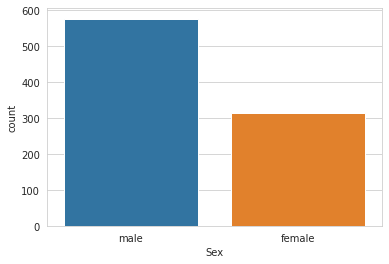

In [ ]:
sns.countplot(train_data.Sex)

**Note**: There were more number of male members on the ship.




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text major ticklabel objects>)

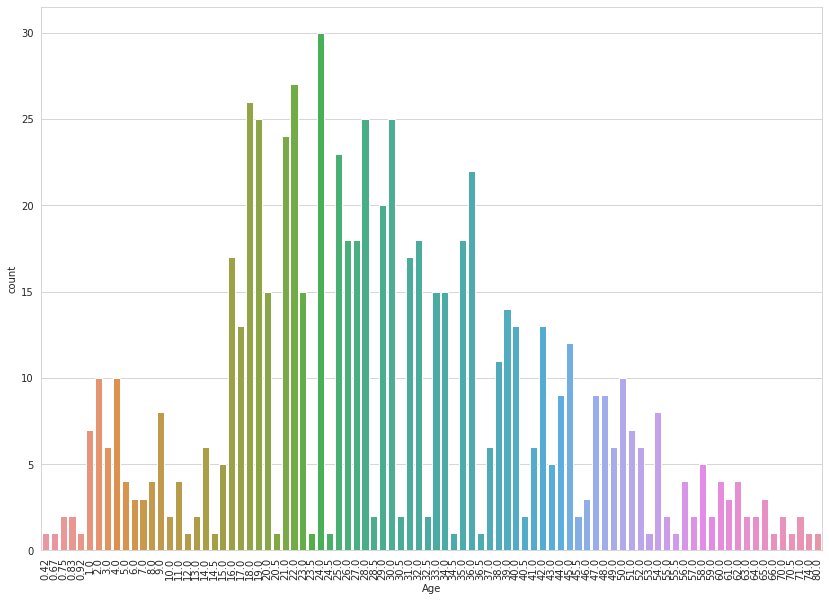

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(train_data.Age)
plt.xticks(rotation=90)

**Note**: Most number of people were between the ages 16-45.

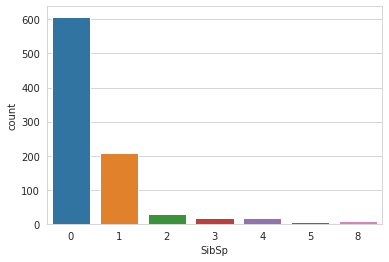

In [ ]:
sns.countplot(train_data.SibSp)

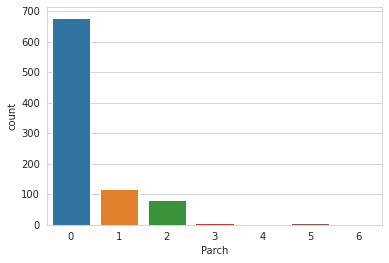

In [ ]:
sns.countplot(train_data.Parch)

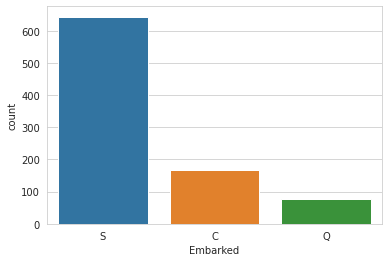

In [ ]:
sns.countplot(train_data.Embarked)

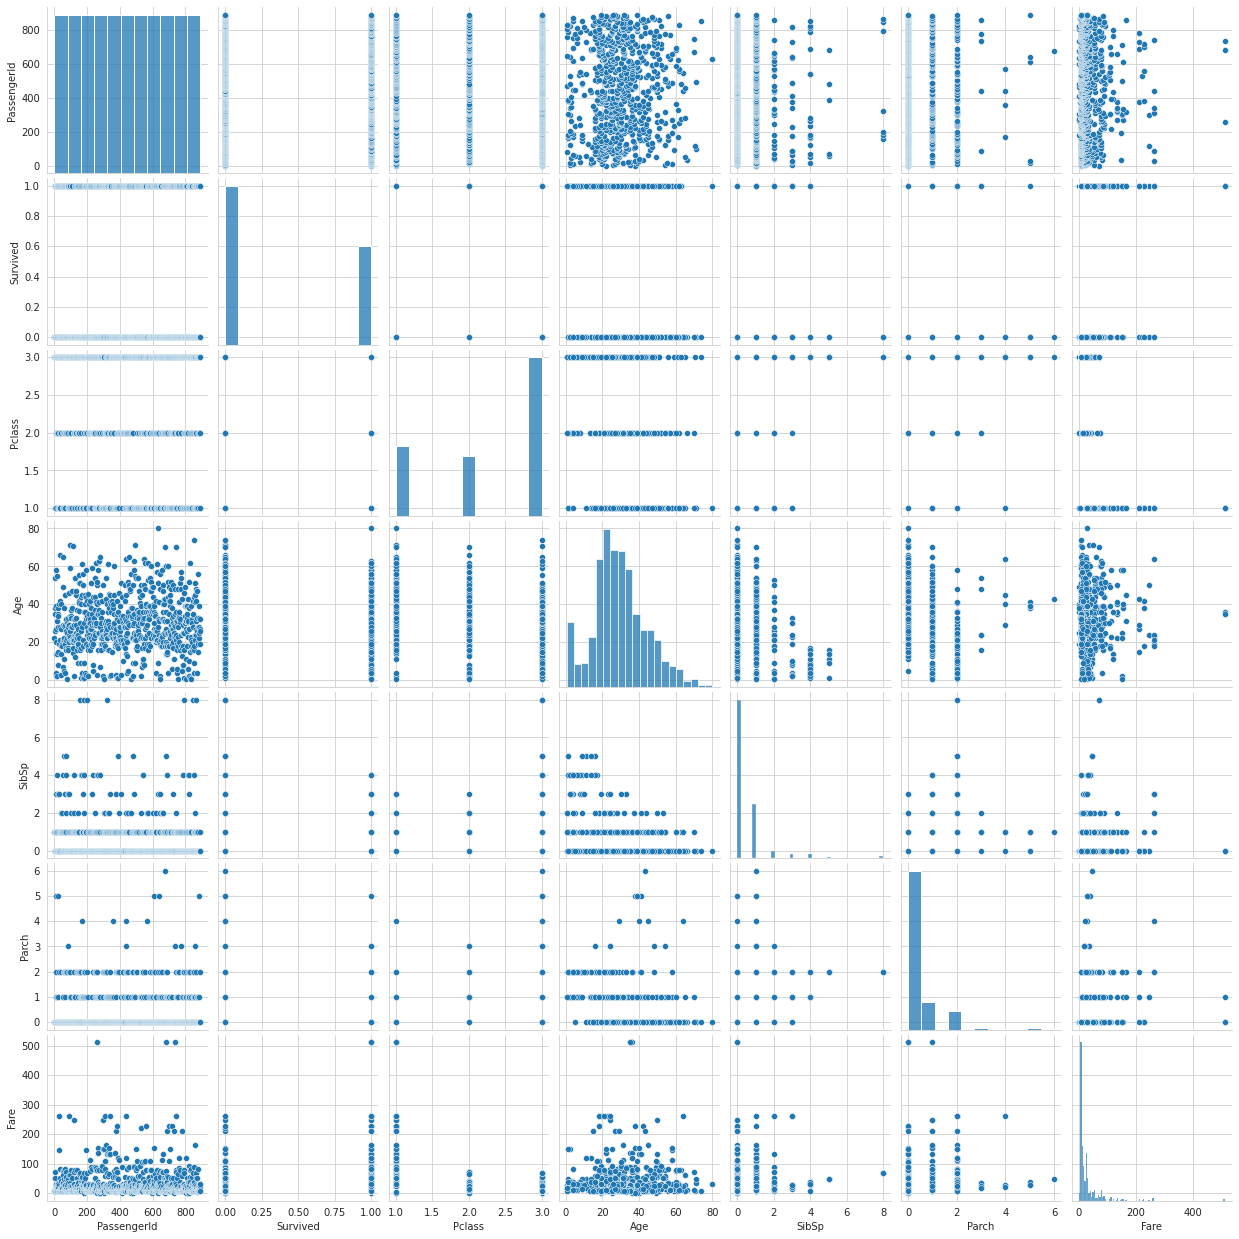

In [ ]:
sns.pairplot(train_data)

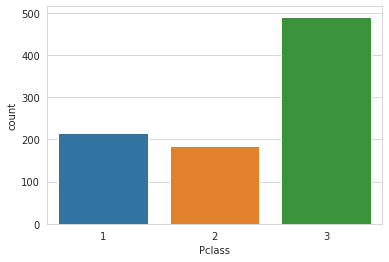

In [ ]:
sns.countplot(train_data.Pclass)

**Note**: Most people travelling were from lower class socio-economic status.

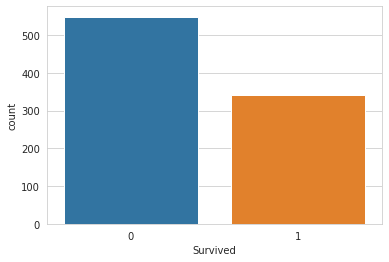

In [ ]:
sns.countplot(train_data.Survived)

**Note:** As we all know, more number of people died than survived.

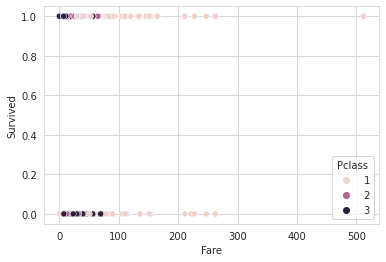

In [ ]:
sns.scatterplot(x=train_data.Fare, y=train_data.Survived, hue=train_data.Pclass)

**Note:**Most of the people who were from 1st class survived.

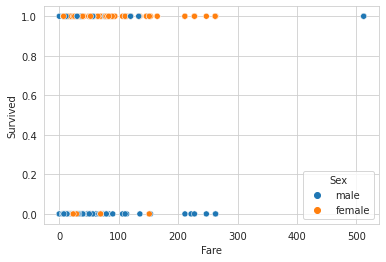

In [ ]:
sns.scatterplot(x=train_data.Fare, y=train_data.Survived, hue=train_data.Sex)

**Note:** More number of females survived.

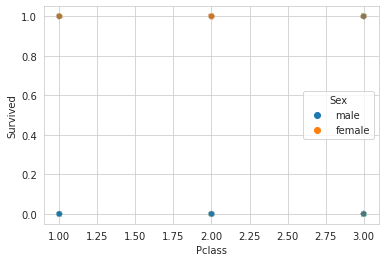

In [ ]:
sns.scatterplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex, alpha=0.05)

**Note:**Most of the first class passengers who were female survived, even the first class males were provided with life boats, and almost all of the first class males didn't make it up.

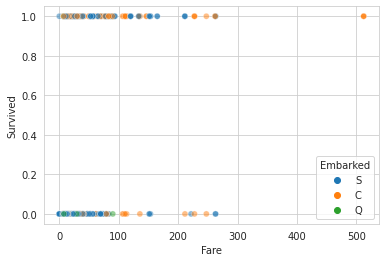

In [ ]:
sns.scatterplot(x=train_data.Fare, y=train_data.Survived, hue=train_data.Embarked, alpha=0.5)

**Note:** People who embarked from Cherbourg mostly suvived

**Note:** Most of cabin values are missing.

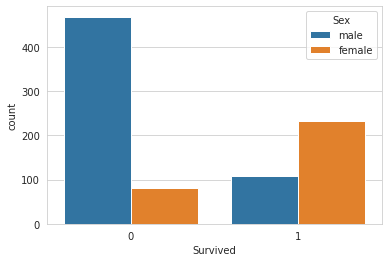

In [ ]:
sns.countplot(x=train_data.Survived,hue=train_data.Sex)

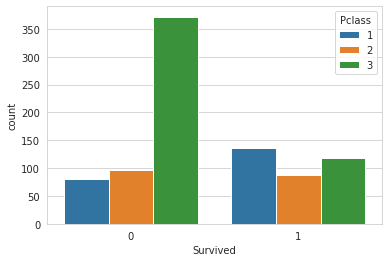

In [ ]:
sns.countplot(x=train_data.Survived,hue=train_data.Pclass)

## Handling missing values

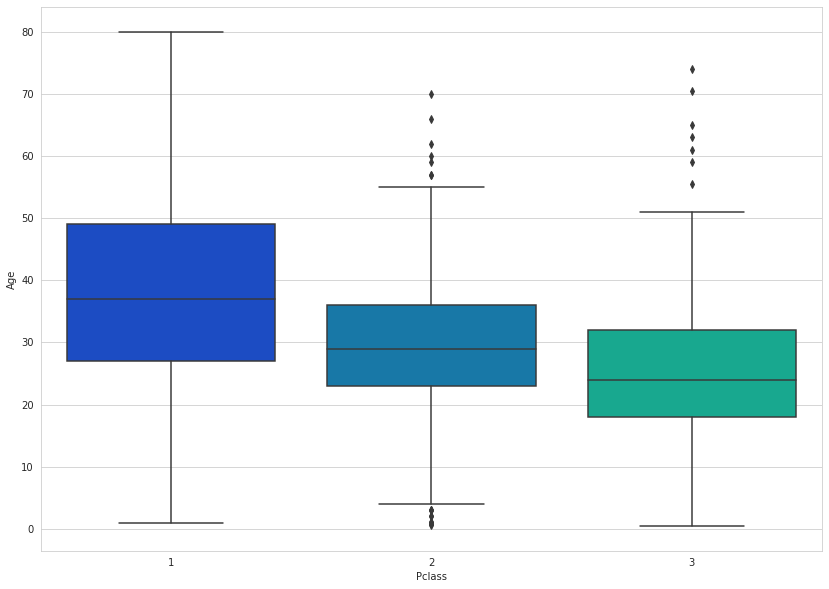

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x=train_data.Pclass,y=train_data.Age,palette='winter')
sns.set_style(style='whitegrid')

In [ ]:
def fill_age(columns):
  Age=columns[0]
  Pclass=columns[1]


  if pd.isnull(Age):

    if Pclass==1:
      return 36

    if Pclass==2:
      return 29

    if Pclass==3:
      return 24

  else:
    return Age


In [ ]:
train_data.Age=train_data[['Age','Pclass']].apply(fill_age,axis=1)

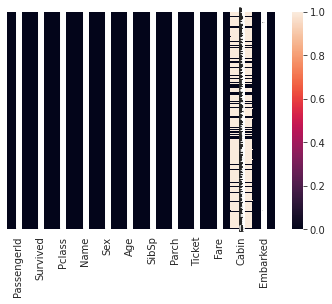

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,annot=True)

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)

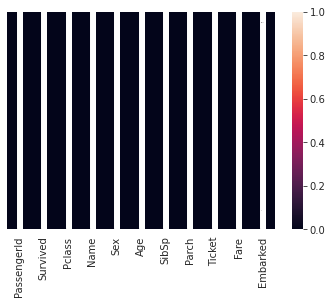

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,annot=True)

**Note:** Here we have filled up missing values and deal with feature cabin as it had almost 25% missing values so dropped it.

### Converting Categorical features

In [ ]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
Sex=pd.get_dummies(train_data['Sex'],drop_first=True)

In [ ]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
Embarked=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [ ]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
train_data.drop(['Sex','Ticket','Embarked','Name'],axis=1,inplace=True)

In [ ]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
data=pd.concat([train_data,Sex,Embarked],axis=1)

In [ ]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
from pycaret.classification import*

In [ ]:
model=setup(data=data,target='Survived')

,Description,Value
0,session_id,5953
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 9)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8283,0.8590,0.7030,0.8338,0.7609,0.6285,0.6358,0.901
gbc,Gradient Boosting Classifier,0.8234,0.8534,0.6945,0.8280,0.7531,0.6175,0.6251,0.101
lightgbm,Light Gradient Boosting Machine,0.8186,0.8520,0.7235,0.7940,0.7554,0.6120,0.6152,0.050
xgboost,Extreme Gradient Boosting,0.8153,0.8409,0.7192,0.7888,0.7507,0.6048,0.6079,0.281
ada,Ada Boost Classifier,0.8122,0.8275,0.7483,0.7663,0.7557,0.6034,0.6050,0.105
lr,Logistic Regression,0.8009,0.8454,0.6782,0.7829,0.7240,0.5702,0.5760,0.107
ridge,Ridge Classifier,0.8009,0.0000,0.6658,0.7885,0.7205,0.5681,0.5741,0.017
lda,Linear Discriminant Analysis,0.8009,0.8443,0.6658,0.7891,0.7204,0.5681,0.5744,0.021
rf,Random Forest Classifier,0.7834,0.8375,0.6740,0.7513,0.7080,0.5368,0.5412,0.510
dt,Decision Tree Classifier,0.7689,0.7572,0.7032,0.7037,0.7018,0.5135,0.5149,0.020


In [ ]:
best_model=create_model(estimator='catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9206,0.9733,0.7917,1.0000,0.8837,0.8247,0.8377
1,0.7619,0.7800,0.6800,0.7083,0.6939,0.4992,0.4995
2,0.7937,0.8547,0.6000,0.8333,0.6977,0.5473,0.5643
3,0.8065,0.8191,0.6250,0.8333,0.7143,0.5724,0.5860
4,0.8065,0.8103,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.7903,0.8553,0.6250,0.7895,0.6977,0.5405,0.5491
6,0.7903,0.8613,0.7083,0.7391,0.7234,0.5547,0.5550
7,0.8871,0.8706,0.8333,0.8696,0.8511,0.7602,0.7607
8,0.9032,0.8618,0.7917,0.9500,0.8636,0.7896,0.7975
9,0.8226,0.9041,0.6667,0.8421,0.7442,0.6112,0.6209


In [ ]:
test_data.drop(['Pclass','Name','Cabin','Ticket'],axis=1)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,male,34.5,0,0,7.8292,Q
1,893,female,47.0,1,0,7.0000,S
2,894,male,62.0,0,0,9.6875,Q
3,895,male,27.0,0,0,8.6625,S
4,896,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,1305,male,NaN,0,0,8.0500,S
414,1306,female,39.0,0,0,108.9000,C
415,1307,male,38.5,0,0,7.2500,S
416,1308,male,NaN,0,0,8.0500,S


In [ ]:
Sex1=pd.get_dummies((test_data.Sex),drop_first=True)

In [ ]:
test_data.drop(['Sex','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [ ]:
test_data

,Pclass,Name,Age,SibSp,Parch,Fare,Cabin
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,NaN
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,NaN
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,NaN
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,NaN
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",NaN,0,0,8.0500,NaN
414,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,108.9000,C105
415,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,7.2500,NaN
416,3,"Ware, Mr. Frederick",NaN,0,0,8.0500,NaN


In [ ]:
test_data.drop(['Name'],axis=1,inplace=True)

In [ ]:
test_data=pd.concat([test_data,Embarked1,Sex1],axis=1)

In [ ]:
y_pred=predict_model(best_model,data=test_data)

In [ ]:
y_pred

,Pclass,Age,SibSp,Parch,Fare,Cabin,Q,S,male,Label,Score
0,3,34.5,0,0,7.8292,NaN,1,0,1,0,0.9138
1,3,47.0,1,0,7.0000,NaN,0,1,0,0,0.8321
2,2,62.0,0,0,9.6875,NaN,1,0,1,0,0.7431
3,3,27.0,0,0,8.6625,NaN,0,1,1,0,0.8202
4,3,22.0,1,1,12.2875,NaN,0,1,0,1,0.5200
...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN,0,1,1,0,0.8101
414,1,39.0,0,0,108.9000,C105,0,0,0,1,0.9845
415,3,38.5,0,0,7.2500,NaN,0,1,1,0,0.9487
416,3,NaN,0,0,8.0500,NaN,0,1,1,0,0.8101


In [ ]:
y_pred.to_csv('Titanic Predictions.csv')